

Perform K-Means,Hierarchical and DBSCAN Clustering for the Universities.csv data
and identify the number of clusters formed and Visualise the results.


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

In [43]:
df = pd.read_csv("Universities.csv")
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [44]:
df.drop('Univ', axis=1, inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   SAT       25 non-null     int64
 1   Top10     25 non-null     int64
 2   Accept    25 non-null     int64
 3   SFRatio   25 non-null     int64
 4   Expenses  25 non-null     int64
 5   GradRate  25 non-null     int64
dtypes: int64(6)
memory usage: 1.3 KB


In [46]:
df.corr()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
SAT,1.000000,0.922522,-0.885850,-0.812552,0.778976,0.747712
Top10,0.922522,1.000000,-0.859181,-0.643435,0.611467,0.745942
Accept,-0.885850,-0.859181,1.000000,0.631664,-0.558439,-0.819550
SFRatio,-0.812552,-0.643435,0.631664,1.000000,-0.781839,-0.560922
Expenses,0.778976,0.611467,-0.558439,-0.781839,1.000000,0.393591
GradRate,0.747712,0.745942,-0.819550,-0.560922,0.393591,1.000000


In [47]:
df.columns

Index(['SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate'], dtype='object')

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [49]:
df_scaled =scaler.transform(df)

In [50]:
df_scaled = pd.DataFrame(df_scaled, columns=['SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate'])

In [51]:
df_scaled.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587


In [67]:
clusters=2
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=clusters)
kmeans.fit(df_scaled)

KMeans(n_clusters=2)

In [68]:
kmeans.labels_

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1])

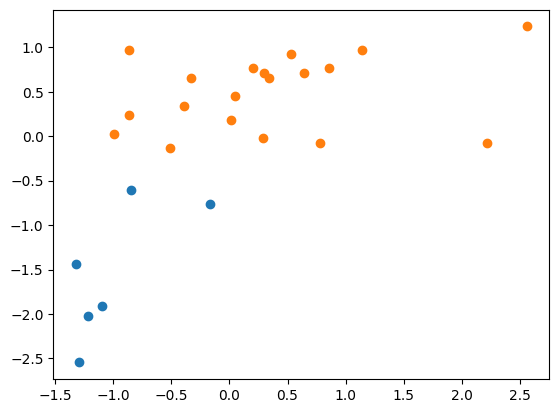

In [69]:
for cluster in range(clusters):
    plt.scatter(
        df_scaled['Expenses'][kmeans.labels_ == cluster], 
        df_scaled['Top10'][kmeans.labels_ == cluster]
    )

In [70]:
# collect wss for all the clusters
wss = []

for cluster in range(1, 10):
    # create kmeans with number of clsuters
    kmeans = KMeans(n_clusters=cluster, random_state=123456)

    # fit the data
    kmeans.fit(df_scaled)

    # collect the sum of squares
    wss.append(kmeans.inertia_)

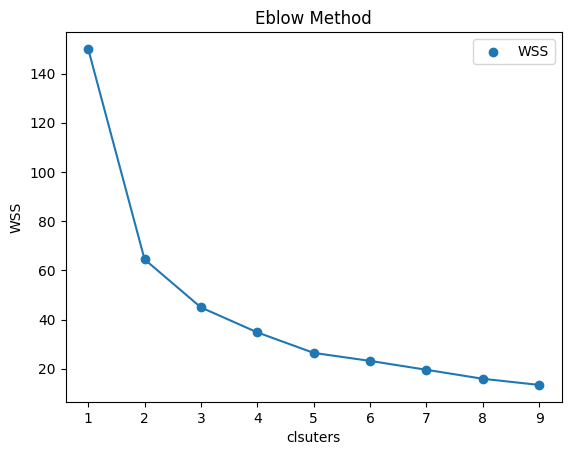

In [71]:
# create the number of clusters
clusters = np.arange(1, 10)

# create the eblow chart
plt.scatter(clusters, wss, label="WSS")
plt.plot(clusters, wss)


plt.xlabel("clsuters")
plt.ylabel("WSS")
plt.title("Eblow Method")
plt.legend()

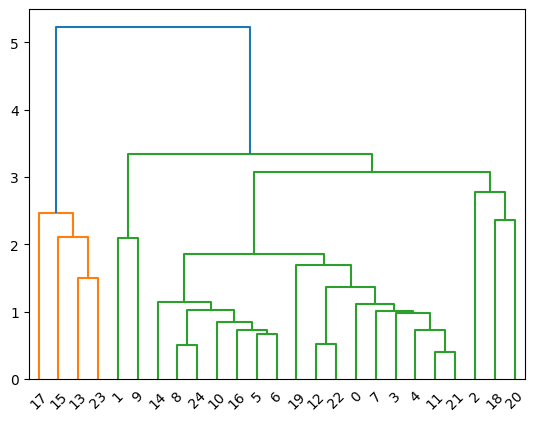

In [72]:
from scipy.cluster import hierarchy
linkage = hierarchy.linkage(df_scaled,method='average')
dendrogram = hierarchy.dendrogram(linkage)

In [73]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=3)
dbscan.fit(df_scaled)

DBSCAN(eps=0.8, min_samples=3)

In [74]:
dbscan.labels_


array([-1, -1, -1, -1,  0,  1,  1,  0,  1, -1,  1,  0, -1, -1,  1, -1,  1,
       -1, -1, -1, -1,  0, -1, -1,  1], dtype=int64)

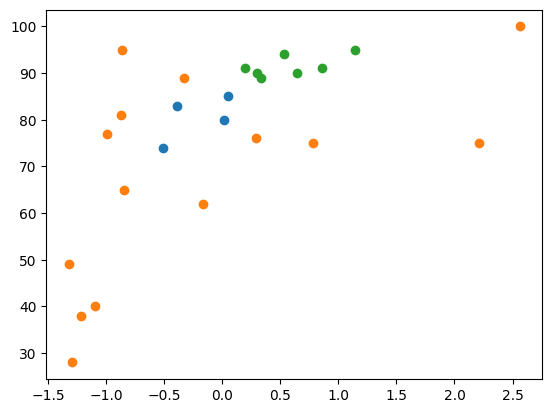

In [77]:

plt.scatter(df_scaled['Expenses'][dbscan.labels_ == 0 ], df['Top10'][dbscan.labels_ == 0])
plt.scatter(df_scaled['Expenses'][dbscan.labels_ == -1], df['Top10'][dbscan.labels_ == -1])
plt.scatter(df_scaled['Expenses'][dbscan.labels_ == 1 ], df['Top10'][dbscan.labels_ == 1])
